In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

%matplotlib inline 

In [10]:
data = pd.read_table('/home/dmitry/airfoil_self_noise.dat.txt',sep='\s+', engine='python')
data

,Frequency,Angle,Chord_length,Free-stream,displacement_thickness,sound_pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [13]:
#Информация об атрибутах:

# 1. Частота в герцах.
# 2. Угол атаки, в градусах.
# 3. Длина хорды, в метрах.
# 4. Скорость набегающего потока, в метрах в секунду.
# 5. Толщина смещения стороны всасывания, м.
# Единственный выход:
# 6. Масштабированный уровень звукового давления в децибелах.

In [38]:
pass_data = data.drop_duplicates(keep='first')
pass_data

,Frequency,Angle,Chord_length,Free-stream,displacement_thickness,sound_pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [39]:
pd.isnull(pass_data).any()

Frequency                 False
Angle                     False
Chord_length              False
Free-stream               False
displacement_thickness    False
sound_pressure            False
dtype: bool

In [40]:
pass_data.describe()

,Frequency,Angle,Chord_length,Free-stream,displacement_thickness,sound_pressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [41]:
pass_data

,Frequency,Angle,Chord_length,Free-stream,displacement_thickness,sound_pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


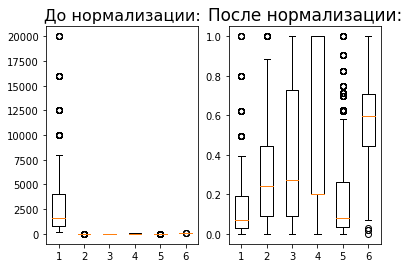

In [43]:
plt.subplot(1, 2, 1);
plt.title('До нормализации:', fontsize=16)
plt.boxplot(pass_data);

pass_data = (pass_data - pass_data.min())/(pass_data.max() - pass_data.min());

plt.subplot(1, 2, 2);
plt.title('После нормализации:', fontsize=17)
plt.boxplot(pass_data);


In [44]:
pass_data

,Frequency,Angle,Chord_length,Free-stream,displacement_thickness,sound_pressure
0,0.030303,0.000000,1.000000,1.000000,0.039005,0.606829
1,0.040404,0.000000,1.000000,1.000000,0.039005,0.580238
2,0.053030,0.000000,1.000000,1.000000,0.039005,0.600181
3,0.070707,0.000000,1.000000,1.000000,0.039005,0.643790
4,0.090909,0.000000,1.000000,1.000000,0.039005,0.640333
...,...,...,...,...,...,...
1498,0.116162,0.702703,0.272727,0.199495,0.904111,0.183051
1499,0.148990,0.702703,0.272727,0.199495,0.904111,0.156194
1500,0.191919,0.702703,0.272727,0.199495,0.904111,0.085729
1501,0.242424,0.702703,0.272727,0.199495,0.904111,0.075624


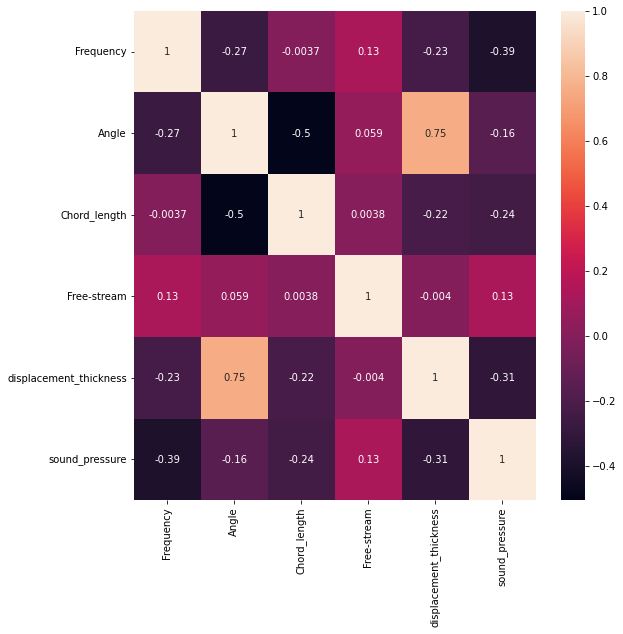

In [46]:
import seaborn as sb
plt.figure(figsize=(9, 9));
corr = pass_data.corr();
sb.heatmap(corr, annot=True);

In [47]:
#1 – линейная регрессия без использования регуляризаторов;
x = pass_data.drop('sound_pressure', axis=1)
y = pass_data['sound_pressure']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10) #размер тестовой выборки 30%

regr = LinearRegression()
regr.fit(x_train, y_train) #обучаем модель на тренировочной выборке

print('Traning data r-squared:', regr.score(x_train, y_train)) #насколько точная train модель
print('Test data r-squared:', regr.score(x_test, y_test)) #насколько точная test модель

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=x_train.columns, columns=['coef'])

Traning data r-squared: 0.5286896482927796
Test data r-squared: 0.4747064069117306
Intercept 0.836744767453502


,coef
Frequency,-0.684309
Angle,-0.235736
Chord_length,-0.259596
Free-stream,0.103097
displacement_thickness,-0.262037


In [53]:
x_incl_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 100)}) #p-value - насколько важен данный параметр
#если >5% (0.05), то данные параметры не очень важны

,coef,p-value
const,0.836745,0.000000e+00
Frequency,-0.684309,0.000000e+00
Angle,-0.235736,3.754565e-17
Chord_length,-0.259596,9.737364e-63
Free-stream,0.103097,1.332620e-22
displacement_thickness,-0.262037,1.078796e-20


In [60]:
xs = pass_data.drop(['sound_pressure'], axis=1)
ys = pass_data['sound_pressure']

cv = cross_val_score(regr,xs,ys, cv=10)
mean_cv = np.mean(cv)
print(mean_cv)

0.3931972359157567


In [63]:
y_pred = regr.predict(x_test) #прогнозы по тестовым данным


In [64]:
check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #реальные и предсказанные значения
check

,Actual,Predicted
811,0.727045,0.735460
1315,0.570612,0.618796
1232,0.665727,0.492284
97,0.643072,0.624057
1440,0.179328,0.321952
...,...,...
573,0.721328,0.634225
1347,0.911479,0.741814
1309,0.781477,0.748400
544,0.741910,0.727453


In [65]:
Acc = pd.DataFrame({'Accuracy': y_test - y_pred}) # реальные - предсказанные значения = точность решения задачи
Acc

,Accuracy
811,-0.008414
1315,-0.048184
1232,0.173443
97,0.019014
1440,-0.142624
...,...
573,0.087103
1347,0.169666
1309,0.033077
544,0.014456


In [81]:
Total = Acc['Accuracy'].sum()
Total = Total/451
Total

0.001814898475286451

In [67]:
check.corr()

,Actual,Predicted
Actual,1.000000,0.691615
Predicted,0.691615,1.000000


In [69]:
check.corr('spearman')

,Actual,Predicted
Actual,1.000000,0.654379
Predicted,0.654379,1.000000


In [70]:
#3 – линейная регрессия, RIDGE регуляризатор;

In [82]:

from sklearn.linear_model import Ridge
ridle = Ridge(alpha=0.1)

cv = cross_val_score(ridle,xs,ys, cv=10)
mean_cv = np.mean(cv)
print('CV: ', mean_cv)
ridle.fit(x_train, y_train)
y_train_pred = ridle.predict(x_train)

print('Traning data r-squared:', ridle.score(x_train, y_train)) #насколько точная train модель
print('Test data r-squared:', ridle.score(x_test, y_test)) #насколько точная test модель

CV:  0.39382595463772263
Traning data r-squared: 0.5286822562524833
Test data r-squared: 0.4749160574561343


In [83]:
#from sys import maxsize
y_test_pred = ridle.predict(x_test) #прогнозы по тестовым данным
#np.set_printoptions(threshold=maxsize)
np.set_printoptions(threshold=1000)
print('predicted response:', y_test_pred, sep='\n')

predicted response:
[0.73496414 0.61879605 0.49264477 0.62369117 0.32273369 0.51620481
 0.50295543 0.57372922 0.68463133 0.38604526 0.76086899 0.52948049
 0.23040401 0.50983484 0.78848029 0.69021137 0.45536305 0.58964146
 0.57557308 0.56454836 0.62193988 0.58123093 0.56100362 0.5339521
 0.60564903 0.3997999  0.6623301  0.58754996 0.53032651 0.8062304
 0.57039586 0.59027461 0.58551058 0.52661115 0.52717049 0.67110768
 0.64606343 0.58783946 0.55687607 0.62157353 0.52447902 0.47557492
 0.5276076  0.51016599 0.33668972 0.46411642 0.61083189 0.84485436
 0.56369568 0.51776495 0.57003191 0.5544867  0.59436875 0.45818755
 0.72090245 0.36007571 0.50820322 0.67792847 0.69039564 0.55600504
 0.58043702 0.50440947 0.70168488 0.59485642 0.5725257  0.58232848
 0.62688016 0.40607651 0.62764932 0.65447686 0.74769105 0.32004887
 0.56266419 0.64518814 0.64802825 0.50923264 0.49504957 0.33607403
 0.42324002 0.68049319 0.30495192 0.51748515 0.48532769 0.73057639
 0.7059575  0.69960258 0.70236127 0.72636488

In [84]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred}) #реальные и предсказанные значения
df_check

,Actual,Predicted
811,0.727045,0.734964
1315,0.570612,0.618796
1232,0.665727,0.492645
97,0.643072,0.623691
1440,0.179328,0.322734
...,...,...
573,0.721328,0.633940
1347,0.911479,0.741275
1309,0.781477,0.747785
544,0.741910,0.726896


In [85]:
A_P = pd.DataFrame({'Accuracy': y_test - y_test_pred}) # реальные - предсказанные значения = точность решения задачи
A_P

,Accuracy
811,-0.007919
1315,-0.048184
1232,0.173082
97,0.019381
1440,-0.143405
...,...
573,0.087389
1347,0.170205
1309,0.033692
544,0.015013


In [86]:
Total = A_P['Accuracy'].sum()
Total = Total/451
Total

0.0018528993452497826

In [87]:
df_check.corr()

,Actual,Predicted
Actual,1.000000,0.691556
Predicted,0.691556,1.000000


In [88]:
df_check.corr('spearman')

,Actual,Predicted
Actual,1.000000,0.654401
Predicted,0.654401,1.000000


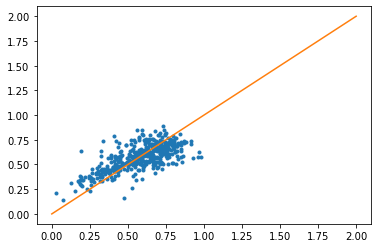

In [89]:
# Прогноз
plt.plot(y_test, y_test_pred, '.')
x = np.linspace(0, 2, 2)
y = x
plt.plot(x, y)
plt.show()

In [90]:
#предсказания
r2_score(y_test, y_test_pred)

0.4749160574561343